In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To visualise the missing values
import missingno as mn

import warnings
warnings.filterwarnings("ignore")

In [4]:
import glob
glob.glob('*.xlsx')

['Data_Science_Assignment.xlsx', '~$Data_Science_Assignment.xlsx']

In [5]:
# importing data

xls = pd.ExcelFile('Data_Science_Assignment.xlsx')
data = pd.read_excel(xls, 'Customer_Data')

In [6]:
#check the shape of the dataset

print("There are {} rows and {} coloumns".format(data.shape[0],data.shape[1]))

There are 77641 rows and 15 coloumns


In [7]:
# To see first 5 Observations from the data set

data.head()

,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
4,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44


In [8]:
# To know the data type of each feature

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 15 columns):
Customer ID                                 77641 non-null object
Title                                       77641 non-null object
Specialty Code                              77641 non-null object
Specialty Description                       77641 non-null object
State                                       77641 non-null object
Region                                      76280 non-null object
Call Attempts                               77641 non-null int64
Calls Successfully Completed                77641 non-null int64
Emails Sent                                 77641 non-null int64
Emails Opened                               77641 non-null int64
Faxes Sent                                  77641 non-null int64
Brand 1 Sales (Company's Brand)             77589 non-null float64
Brand 2 Sales (Competitor Brand)            33846 non-null float64
Total Branded Market Sales          

In [9]:
data.columns

Index(['Customer ID', 'Title', 'Specialty Code', 'Specialty Description',
       'State', 'Region', 'Call Attempts', 'Calls Successfully Completed',
       'Emails Sent', 'Emails Opened', 'Faxes Sent',
       'Brand 1 Sales (Company's Brand)', 'Brand 2 Sales (Competitor Brand)',
       'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Attempts,77641.0,2.497096,1.706586,0.0,1.0,2.0,4.0,5.0
Calls Successfully Completed,77641.0,1.412437,1.524812,0.0,0.0,1.0,2.0,5.0
Emails Sent,77641.0,9.985150,6.026626,0.0,5.0,10.0,15.0,20.0
Emails Opened,77641.0,5.941732,5.561027,0.0,0.0,5.0,10.0,20.0
Faxes Sent,77641.0,5.508636,2.871542,1.0,3.0,6.0,8.0,10.0
Brand 1 Sales (Company's Brand),77589.0,4.770019,2.672652,0.0,3.0,5.0,6.0,70.0
Brand 2 Sales (Competitor Brand),33846.0,1.658719,4.148801,0.0,0.0,1.0,2.0,370.0
Total Branded Market Sales,77641.0,30.527209,15.235257,1.0,18.0,31.0,43.0,397.0
Total Market (Branded + Unbranded) Sales,77641.0,77.805116,95.908356,0.0,24.0,50.0,97.0,3119.0


In [11]:
# see the missing values in the data

data.isnull().sum()

Customer ID                                     0
Title                                           0
Specialty Code                                  0
Specialty Description                           0
State                                           0
Region                                       1361
Call Attempts                                   0
Calls Successfully Completed                    0
Emails Sent                                     0
Emails Opened                                   0
Faxes Sent                                      0
Brand 1 Sales (Company's Brand)                52
Brand 2 Sales (Competitor Brand)            43795
Total Branded Market Sales                      0
Total Market (Branded + Unbranded) Sales        0
dtype: int64

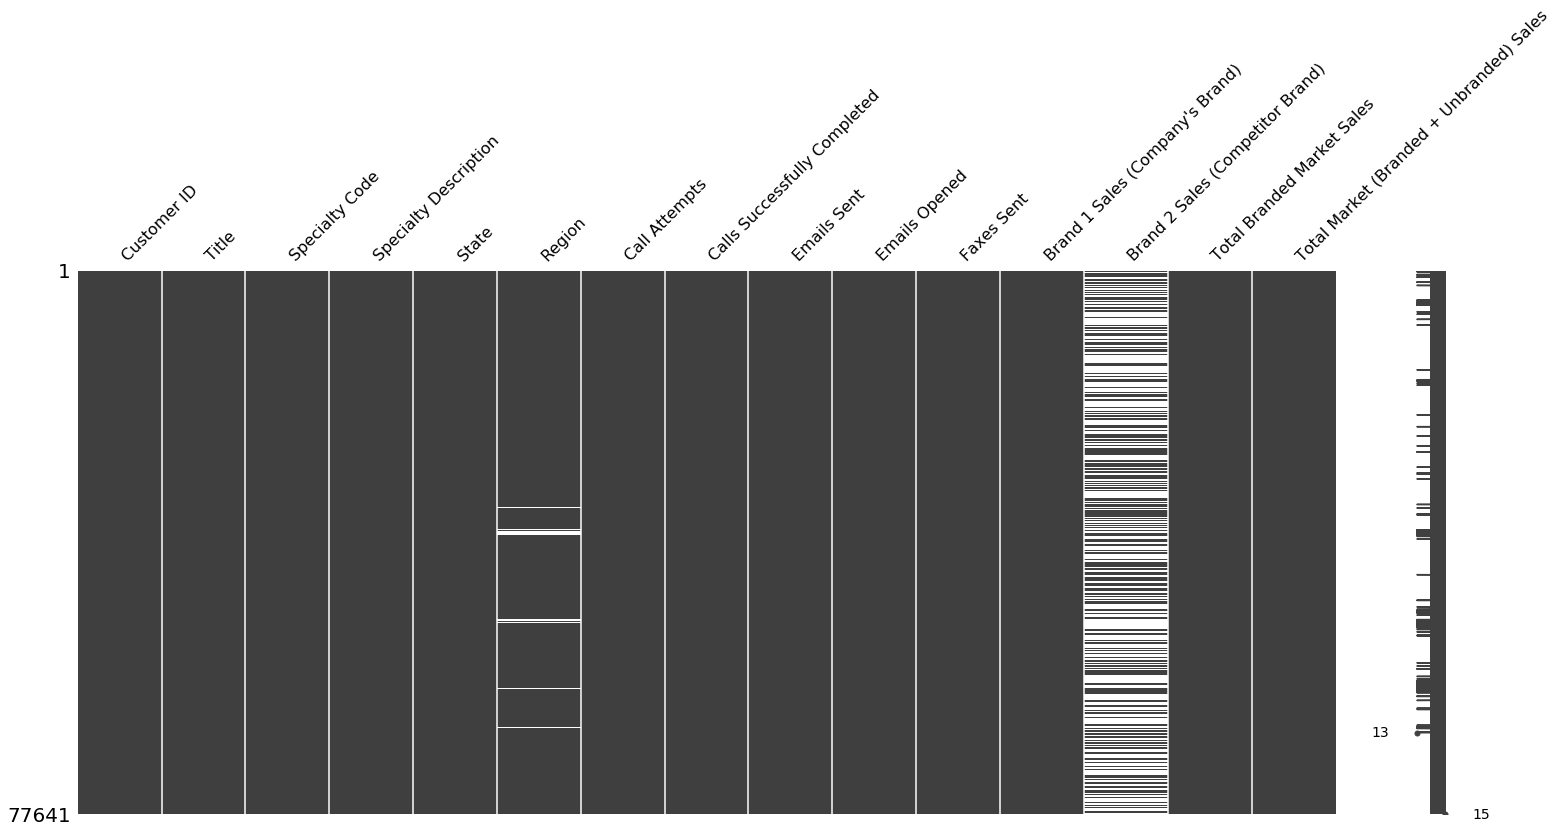

In [12]:
# Visualising the missing values

mn.matrix(data)

- The mn.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
- This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

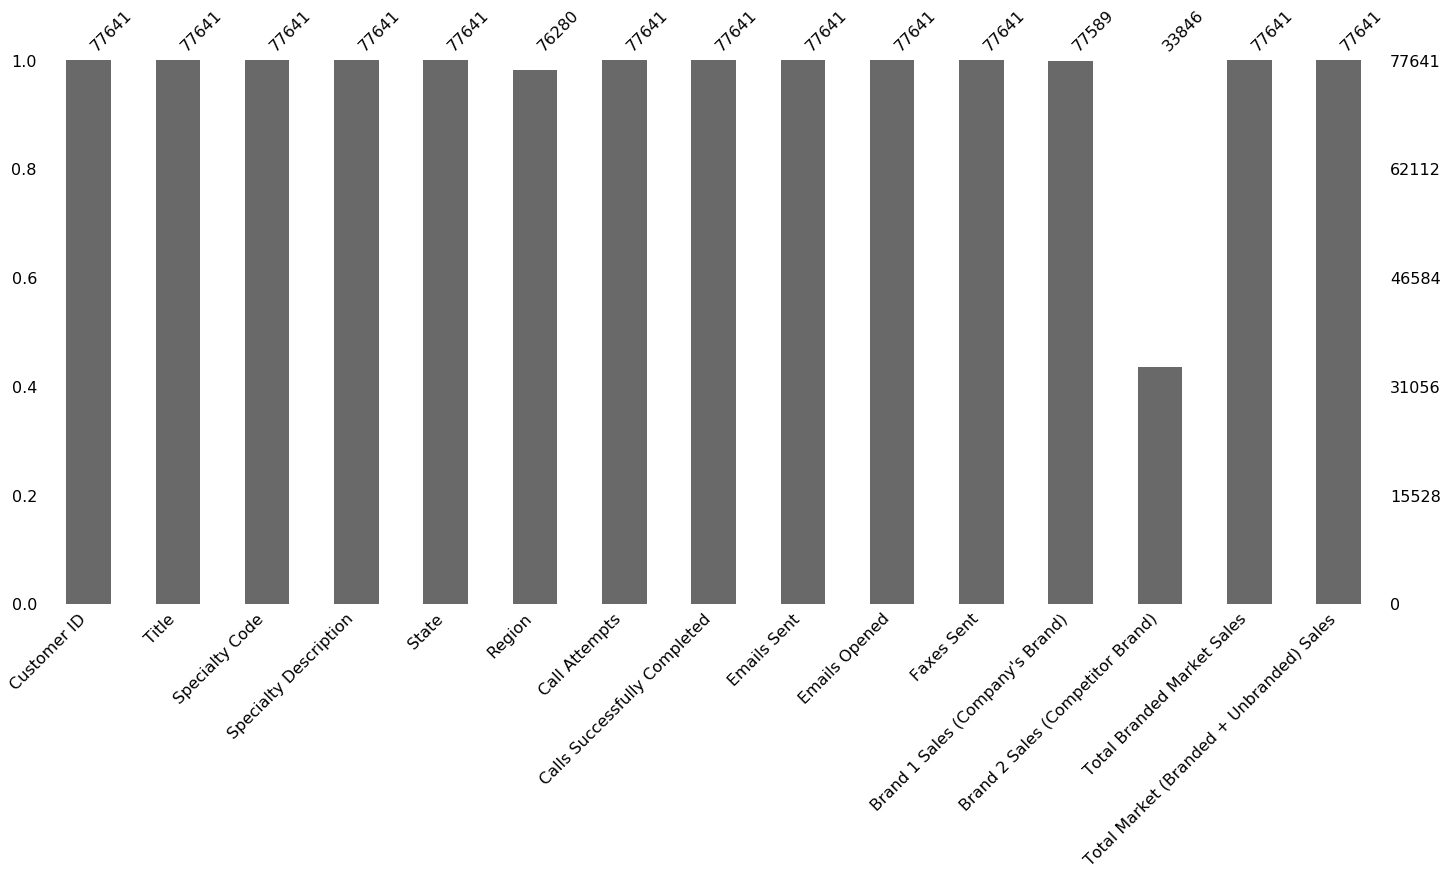

In [13]:
#mn.bar is a simple visualization of nullity by column
mn.bar(data)

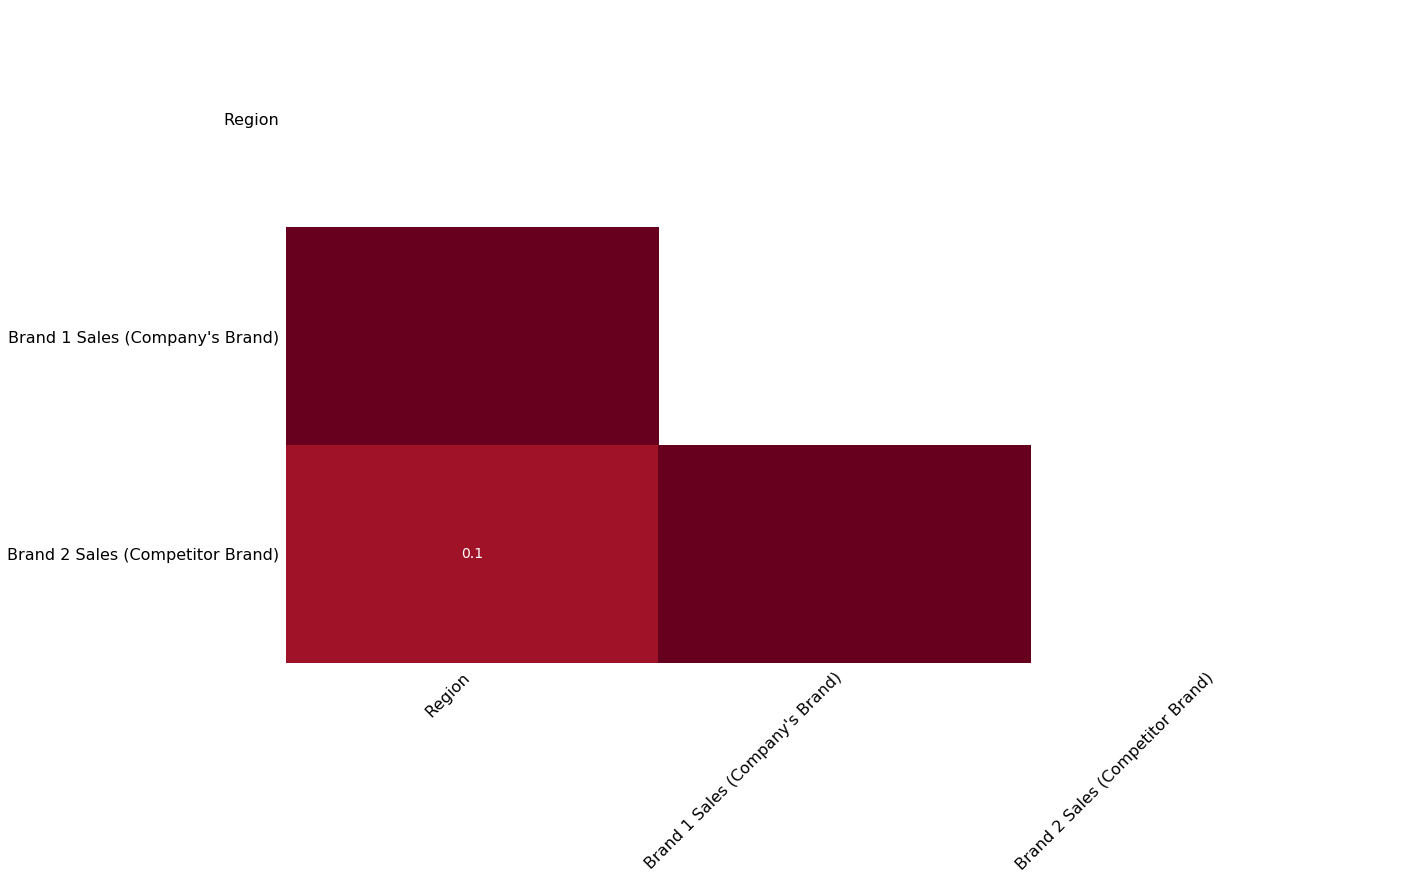

In [14]:
mn.heatmap(data)

- The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
- Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
- Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization

In [15]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category') 
    else:
        pass

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 15 columns):
Customer ID                                 77641 non-null category
Title                                       77641 non-null category
Specialty Code                              77641 non-null category
Specialty Description                       77641 non-null category
State                                       77641 non-null category
Region                                      76280 non-null category
Call Attempts                               77641 non-null int64
Calls Successfully Completed                77641 non-null int64
Emails Sent                                 77641 non-null int64
Emails Opened                               77641 non-null int64
Faxes Sent                                  77641 non-null int64
Brand 1 Sales (Company's Brand)             77589 non-null float64
Brand 2 Sales (Competitor Brand)            33846 non-null float64
Total Branded Market Sal

In [17]:
data.replace('' , np.NaN, inplace=True)

In [18]:
data.head()

,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
4,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44


In [19]:
data.Region.value_counts()

South Region        29112
Midwest Region      18201
Northeast Region    15566
West Region         13401
Name: Region, dtype: int64

In [20]:
data.Region.replace(np.NaN, 'Region-Missing',inplace = True)

In [21]:
pd.crosstab(data.State,data.Region)

Region,Midwest Region,Northeast Region,Region-Missing,South Region,West Region
State,,,,,
SC,0,0,0,1110,0
AL,0,0,0,1090,0
TN,0,0,0,1914,0
TX,0,0,0,5971,0
LA,0,0,0,1178,0
MA,0,1389,0,0,0
FL,0,0,0,5005,0
IA,909,0,0,0,0
VA,0,0,0,1791,0


#### Here,Region values are missing and we can Impute Region missing values accroding to state.
#### And here Mainly region missing for States PR,DC,AP,AE,VI

In [22]:
#To select rows whose column value equals a scalar, some_value, use ==:
data.loc[data['Region'] == 'Region-Missing']

,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
2102,IND002103,MD,ORS,ORTHOPEDIC SURGERY,PR,Region-Missing,1,0,18,10,9,3.0,NaN,42,26
2886,IND002887,MD,ID,INFECTIOUS DISEASES,DC,Region-Missing,4,3,12,7,7,6.0,0.0,28,16
3789,IND003790,MD,IM,INTERNAL MEDICINE,DC,Region-Missing,3,0,6,0,2,1.0,2.0,21,27
4155,IND004156,MD,IC,CARDIOVASCULAR DISEASES,DC,Region-Missing,4,3,11,5,1,4.0,0.0,36,15
4215,IND004216,MD,OM,OCCUPATIONAL MEDICINE,DC,Region-Missing,4,1,3,0,5,2.0,NaN,51,13
4233,IND004234,MD,IM,INTERNAL MEDICINE,DC,Region-Missing,5,2,2,0,2,2.0,NaN,17,30
4422,IND004423,MD,IM,INTERNAL MEDICINE,DC,Region-Missing,1,1,19,11,2,5.0,0.0,36,2
4471,IND004472,MD,IM,INTERNAL MEDICINE,PR,Region-Missing,3,0,1,1,8,5.0,NaN,26,37
4480,IND004481,MD,ID,INFECTIOUS DISEASES,DC,Region-Missing,0,0,18,17,8,6.0,NaN,30,31
4646,IND004647,MD,CD,CARDIOVASCULAR DISEASES,DC,Region-Missing,1,0,12,9,10,5.0,1.0,13,19


In [23]:
promotion = data.loc[:,'Call Attempts':'Faxes Sent']

In [24]:
promotion.head()

,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent
0,1,0,13,6,8
1,1,0,15,8,6
2,2,1,4,2,6
3,0,0,11,9,8
4,5,5,0,0,9


In [25]:
promotion.describe()

,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent
count,77641.000000,77641.000000,77641.000000,77641.000000,77641.000000
mean,2.497096,1.412437,9.985150,5.941732,5.508636
std,1.706586,1.524812,6.026626,5.561027,2.871542
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,5.000000,0.000000,3.000000
50%,2.000000,1.000000,10.000000,5.000000,6.000000
75%,4.000000,2.000000,15.000000,10.000000,8.000000
max,5.000000,5.000000,20.000000,20.000000,10.000000


### Observations:

- 1.The average Number of Call Attempts made to Doctors are 2 and Calls Successfully Completed are 1
- 2. Number of mails sent on an average are 10 and in that only 6 mails are getting opened

In [26]:
promotion.corr()

,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent
Call Attempts,1.000000,0.798613,-0.001243,-0.000755,0.003764
Calls Successfully Completed,0.798613,1.000000,0.000735,0.001628,0.006264
Emails Sent,-0.001243,0.000735,1.000000,0.868077,-0.001850
Emails Opened,-0.000755,0.001628,0.868077,1.000000,-0.001855
Faxes Sent,0.003764,0.006264,-0.001850,-0.001855,1.000000


In [27]:
Sales = data.loc[:,"Brand 1 Sales (Company's Brand)":"Total Market (Branded + Unbranded) Sales"]

In [28]:
Sales.head()

,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,8.0,NaN,27,131
1,3.0,NaN,40,56
2,7.0,NaN,27,161
3,9.0,NaN,39,180
4,4.0,NaN,14,44


In [29]:
Sales.corr()

,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
Brand 1 Sales (Company's Brand),1.000000,0.054421,0.180443,0.334464
Brand 2 Sales (Competitor Brand),0.054421,1.000000,0.271218,0.096115
Total Branded Market Sales,0.180443,0.271218,1.000000,0.079740
Total Market (Branded + Unbranded) Sales,0.334464,0.096115,0.079740,1.000000


### Hypothesis : Assuming Null values of the sales as the 0 sales

In [30]:
data["Brand 1 Sales (Company's Brand)"].replace(np.NaN,0,inplace = True)

In [31]:
data["Brand 2 Sales (Competitor Brand)"].replace(np.NaN,0,inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 15 columns):
Customer ID                                 77641 non-null category
Title                                       77641 non-null category
Specialty Code                              77641 non-null category
Specialty Description                       77641 non-null category
State                                       77641 non-null category
Region                                      77641 non-null object
Call Attempts                               77641 non-null int64
Calls Successfully Completed                77641 non-null int64
Emails Sent                                 77641 non-null int64
Emails Opened                               77641 non-null int64
Faxes Sent                                  77641 non-null int64
Brand 1 Sales (Company's Brand)             77641 non-null float64
Brand 2 Sales (Competitor Brand)            77641 non-null float64
Total Branded Market Sales

In [33]:
categorical_data = data.select_dtypes(include=('category','object'))
numerical_data = data.select_dtypes(include=('int64','float64'))

print(categorical_data.shape)
print(numerical_data.shape)

(77641, 6)
(77641, 9)


In [34]:
corr = numerical_data.corr()
corr

,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
Call Attempts,1.000000,0.798613,-0.001243,-0.000755,0.003764,0.201159,-0.001851,0.033670,-0.003063
Calls Successfully Completed,0.798613,1.000000,0.000735,0.001628,0.006264,0.306398,-0.000876,0.054711,-0.000675
Emails Sent,-0.001243,0.000735,1.000000,0.868077,-0.001850,0.330630,0.003257,0.054319,0.001192
Emails Opened,-0.000755,0.001628,0.868077,1.000000,-0.001855,0.449677,0.005089,0.072923,-0.000114
Faxes Sent,0.003764,0.006264,-0.001850,-0.001855,1.000000,0.212136,0.003067,0.036016,0.000145
Brand 1 Sales (Company's Brand),0.201159,0.306398,0.330630,0.449677,0.212136,1.000000,0.052227,0.180516,0.333912
Brand 2 Sales (Competitor Brand),-0.001851,-0.000876,0.003257,0.005089,0.003067,0.052227,1.000000,0.193634,0.088990
Total Branded Market Sales,0.033670,0.054711,0.054319,0.072923,0.036016,0.180516,0.193634,1.000000,0.079740
Total Market (Branded + Unbranded) Sales,-0.003063,-0.000675,0.001192,-0.000114,0.000145,0.333912,0.088990,0.079740,1.000000


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIFfunc(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors

VIFfunc(numerical_data)
    

,columns,vif
0,Call Attempts,7.747328
1,Calls Successfully Completed,5.509875
2,Emails Sent,12.942652
3,Emails Opened,9.726544
4,Faxes Sent,4.170315
5,Brand 1 Sales (Company's Brand),7.832049
6,Brand 2 Sales (Competitor Brand),1.109767
7,Total Branded Market Sales,4.295541
8,Total Market (Branded + Unbranded) Sales,1.999348


In [36]:
numerical_data.drop(['Emails Sent'],axis = 1, inplace = True)

In [37]:
VIFfunc(numerical_data)

,columns,vif
0,Call Attempts,7.583773
1,Calls Successfully Completed,5.506698
2,Emails Opened,2.843348
3,Faxes Sent,3.874782
4,Brand 1 Sales (Company's Brand),7.740158
5,Brand 2 Sales (Competitor Brand),1.109385
6,Total Branded Market Sales,4.066060
7,Total Market (Branded + Unbranded) Sales,1.969701


In [38]:
categorical_data.head()

,Customer ID,Title,Specialty Code,Specialty Description,State,Region
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region
4,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region


In [39]:
categorical_data.drop(['Customer ID'],axis = 1, inplace = True)

In [40]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any categorical_dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(categorical_data.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                categorical_data[feature] = le.fit_transform(categorical_data[feature])
            except:
                print('Error encoding '+feature)
        return df

In [41]:
dummyEncode(categorical_data)

,Title,Specialty Code,Specialty Description,State,Region
0,26,33,25,43,3
1,26,15,11,43,3
2,26,61,47,2,3
3,26,33,25,2,3
4,26,15,11,2,3
5,26,29,23,2,3
6,26,61,47,45,3
7,26,33,25,46,3
8,26,33,25,20,3
9,26,61,47,2,3


In [42]:
# concate data

data1 = pd.concat([categorical_data,numerical_data],axis = 1)

In [43]:
data1.head()

,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,26,33,25,43,3,1,0,6,8,8.0,0.0,27,131
1,26,15,11,43,3,1,0,8,6,3.0,0.0,40,56
2,26,61,47,2,3,2,1,2,6,7.0,0.0,27,161
3,26,33,25,2,3,0,0,9,8,9.0,0.0,39,180
4,26,15,11,2,3,5,5,0,9,4.0,0.0,14,44


In [45]:
X = data1.iloc[:, :-2]
y = data1.iloc[:, -2]

In [46]:
X.head()

,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand)
0,26,33,25,43,3,1,0,6,8,8.0,0.0
1,26,15,11,43,3,1,0,8,6,3.0,0.0
2,26,61,47,2,3,2,1,2,6,7.0,0.0
3,26,33,25,2,3,0,0,9,8,9.0,0.0
4,26,15,11,2,3,5,5,0,9,4.0,0.0


In [47]:
y.head()

0    27
1    40
2    27
3    39
4    14
Name: Total Branded Market Sales, dtype: int64

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [63]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [65]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

219.3030902211119

In [66]:
# R² Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0596593921098828

In [67]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

In [68]:
from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeClassifier is the corresponding Classifier
DTregressor = DecisionTreeRegressor (max_depth=3, random_state = 0)
DTregressor.fit (X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')